In [3]:
import os
os.chdir('/home/jrhmc1/Desktop/EquitablePartitions/src')
import ep_finder as epf
import lep_finder as lepf
import graphs as g
import ep_utils as epu
import timing as tim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
os.chdir('/home/jrhmc1/Desktop/EquitablePartitions/Networks/Theoretical')
G = g.oneGraphToRuleThemAll("bertha_25.graphml",suppress=True)
G = G.tocsr()



		GraphML File Detected




In [5]:
ep = epf.getEquitablePartition(epf.initFromSparse(G))
lep = lepf.getLocalEquitablePartitions(lepf.initFromSparse(G),ep)
lep_scat,_ = tim.prep_scatter(lep,3)

epu._getEigenvaluesSparseFromPartialLeps(G.tocsc(),G,ep,lep_scat[0],include_globals=True)

(array([-8.58662213,  8.75577524,  0.33089027,  5.26853655, -4.76857993]),
 [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0])

# Making table with data

In [7]:
os.chdir('/home/jrhmc1/Desktop/EquitablePartitions/Results')
df = pd.read_csv('Master_keeper.csv',index_col=0)
df

,Graph_name,Graph_size,Graph_format,Run_type,Nontriv_ep_perc,Nontriv_lep_perc,Partitioned_times,Total_noGraph,Total_wGraph
SlurmID,,,,,,,,,
2415130,bio-celegans-dir,453.0,graphml,serial,NaN,NaN,NaN,NaN,0.165163
2415131,bio-celegans-ud,453.0,graphml,serial,NaN,NaN,NaN,NaN,0.341302
2415132,bio-diseasome,516.0,graphml,serial,NaN,NaN,NaN,NaN,0.296699
2415133,bio-grid-fruitfly,7274.0,graphml,serial,NaN,NaN,NaN,NaN,1348.113947
2415134,bio-yeast-protein-inter,1870.0,graphml,serial,NaN,NaN,NaN,NaN,9.844159
2434408,bio-celegans-dir,453.0,graphml,parallel,0.128035,0.004762,"{'longest_lep_time': 9.068695362657309e-05, 'l...",0.004963,0.044508
2434443,bio-celegans-ud,453.0,graphml,parallel,0.136865,0.004785,"{'longest_lep_time': 9.115098509937525e-05, 'l...",0.003968,0.016072
2434464,bio-diseasome,516.0,graphml,parallel,0.509690,0.000000,"{'longest_lep_time': 2.939486876130104e-05, 'l...",0.002882,0.015047
2434483,bio-grid-fruitfly,7274.0,graphml,parallel,0.195491,0.001587,"{'longest_lep_time': 0.0001891651190817356, 'l...",0.009182,0.150609


In [15]:
graph_names

array(['bio-celegans-dir', 'bio-celegans-ud', 'bio-diseasome',
       'bio-grid-fruitfly', 'bio-yeast-protein-inter'], dtype=object)

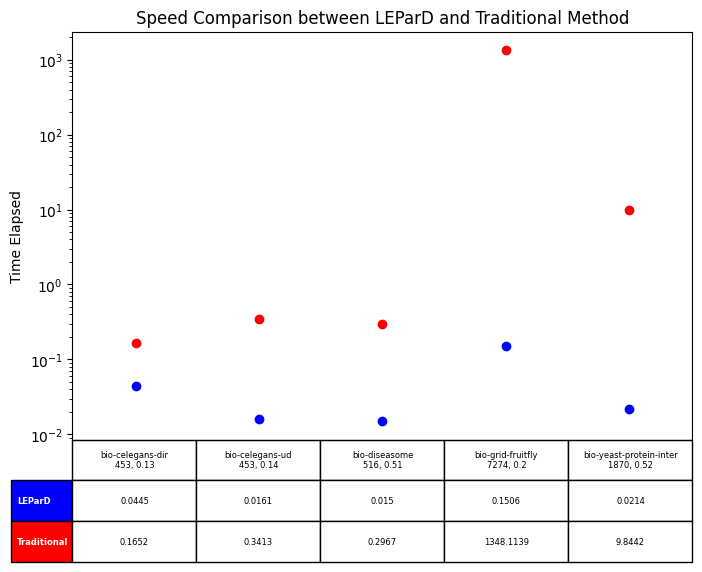

In [71]:


# Data labels
graph_names = pd.unique(df['Graph_name'])


info = {}
for label,ts in df.groupby('Run_type'):
    info[label] = {'times': np.round(ts['Total_wGraph'].to_numpy(),4), 'sizes': ts['Graph_size'].to_numpy(), 'ep_percs': ts['Nontriv_ep_perc'].to_numpy()}

# X-axis positions
x = np.linspace(0,4.7,5)#np.arange(len(graph_names))

# Create figure and plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot
ax.scatter(x, info['parallel']['times'], color='blue', label='LEParD')
ax.scatter(x, info['serial']['times'], color='red', label='Original')

# Labels and title
# ax.set_xticks(x)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax.set_ylabel("Time Elapsed")
ax.set_yscale('log')
ax.set_xlim(-.6,5.3)
ax.set_title("Speed Comparison between LEParD and Traditional Method")

# Table Data
table_data = [list(info['parallel']['times']), list(info['serial']['times'])]
column_labels = []
for name,size,perc in zip(graph_names,info['parallel']['sizes'],info['parallel']['ep_percs']):
    column_labels.append(name + '\n' + str(int(size)) + ', ' + str(np.round(perc,2)))
# column_labels = [""] + graph_names
row_labels = ["LEParD", "Traditional"]

# Add table
table = plt.table(cellText=table_data,
                  colLabels=column_labels,
                  rowLabels=row_labels,
                  loc='bottom',
                  cellLoc='center',
                  bbox=[0, -0.3, 1, .3])  # Adjust position

# Color row labels
for i, color in enumerate(["blue", "red"]):  # Ours -> Blue, Theirs -> Red
    cell = table.get_celld()[(i+1, -1)]  # Row label cells
    cell.set_facecolor(color)
    cell.set_text_props(color='white', fontweight='bold')

for key, cell in table.get_celld().items():
    cell.set_fontsize(15)  # Adjust this number for bigger or smaller text
    cell.set_text_props(fontname='sans-serif')

# for i in range(len(graph_names)):
#     cell2 = table.get_celld()[(0,i)]
#     cell2.set_text_props(fontweight='bold', fontsize=25)


# Adjust layout to fit table
plt.subplots_adjust(bottom=0.2)

# Show plot
plt.show()


In [16]:
table_data

[['LEParD',
  0.0445079569472,
  0.0160723220324143,
  0.0150470358785241,
  0.1506094119977206,
  0.021398208104074],
 ['Traditional',
  0.1651626660022884,
  0.3413015729747712,
  0.2966990279965102,
  1348.113946511061,
  9.844159409985878]]